**Women's E-Commerce Clothing Reviews** 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("/content/Womens Clothing E-Commerce Reviews.csv")

# About the Data


In [4]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


1) Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.

2) Age: Positive Integer variable of the reviewers age.

3) Title: String variable for the title of the review.

4) Review Text: String variable for the review body.

5) Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

6) Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

7) Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.

8) Division Name: Categorical name of the product high level division.

9) Department Name: Categorical name of the product department name.

10) Class Name: Categorical name of the product class name.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


# Data PreProcessing

Feature Selection

In [6]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True) #remove unnecessary columns from data


Removing Duplicates

In [7]:
#checking for duplicated entries
duplicates = df.duplicated().sum() 
if  duplicates == 0:
    print("There are no duplicted rows in this data")
else:
    print('There are: ', str(duplicates), " duplicates")

There are:  21  duplicates


In [8]:
df=df.drop_duplicates()

Checking for Null values

In [9]:
df["Review Text"].isnull().sum()

825

-Apparently, the Count of Null values is small compared to the dataset size, So they are to be dropped.

In [10]:
df.dropna(subset=['Review Text'], inplace= True)


In [11]:
df["Review Text"].isnull().sum()

0

In [12]:
df["Recommended IND"].isnull().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22640 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              22640 non-null  int64 
 1   Age                      22640 non-null  int64 
 2   Title                    19675 non-null  object
 3   Review Text              22640 non-null  object
 4   Rating                   22640 non-null  int64 
 5   Recommended IND          22640 non-null  int64 
 6   Positive Feedback Count  22640 non-null  int64 
 7   Division Name            22627 non-null  object
 8   Department Name          22627 non-null  object
 9   Class Name               22627 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.9+ MB


# EDA 

In [14]:
df["Recommended IND"].value_counts()

1    18539
0     4101
Name: Recommended IND, dtype: int64

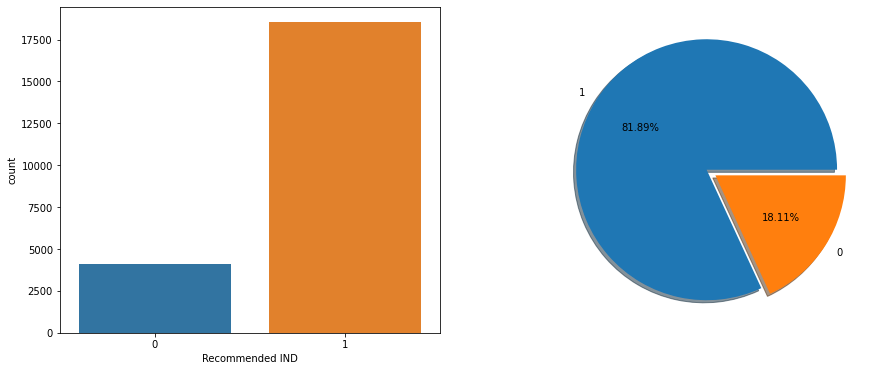

In [15]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x = df['Recommended IND'], data = df)

plt.subplot(1, 2, 2)
plt.pie(x= df['Recommended IND'].value_counts(), labels = ("1","0"), explode = (0, 0.08), shadow = True, autopct = '%1.2f%%')

plt.show()

**Resampling**

In [16]:
from sklearn.utils import resample

#create two different dataframe of majority and minority class 
df_majority = df[(df['Recommended IND']==1)] 
df_minority = df[(df['Recommended IND']==0)] 

# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples=15539 , # to match majority class
                                 random_state=42)  # reproducible results
                                 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [17]:
df_upsampled['Recommended IND'].value_counts

<bound method IndexOpsMixin.value_counts of 4926     0
21598    0
17773    0
2579     0
19705    0
        ..
23479    1
23481    1
23482    1
23484    1
23485    1
Name: Recommended IND, Length: 34078, dtype: int64>

***After resampling***

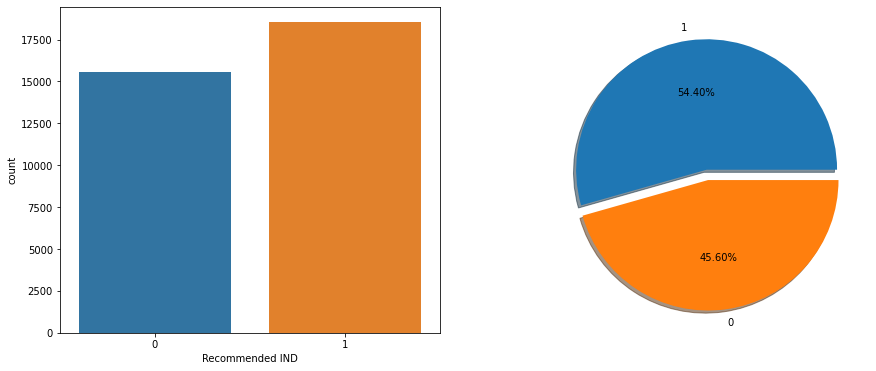

In [18]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x = df_upsampled['Recommended IND'], data = df)

plt.subplot(1, 2, 2)
plt.pie(x= df_upsampled['Recommended IND'].value_counts(), labels = ("1","0"), explode = (0, 0.08), shadow = True, autopct = '%1.2f%%')

plt.show()

- 0 means "not recommended product", while 1 means "Recommeded product". 
- The above graph means that the majority of the store's products are recmmended for purchasing.

In [19]:
df["Rating"].value_counts()

5    12539
4     4908
3     2823
2     1549
1      821
Name: Rating, dtype: int64

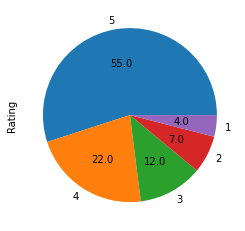

In [20]:
round(df['Rating'].value_counts()/df.shape[0]*100).plot.pie(autopct='%1.1f') 

- As shown in the above graph, Although more than 50% of customers rated "5" for the store's products, about more than 11% of customers were not satisfies by the products and voted for "1" and "2".

In [21]:
df["Division Name"].value_counts()

General           13364
General Petite     7837
Initmates          1426
Name: Division Name, dtype: int64

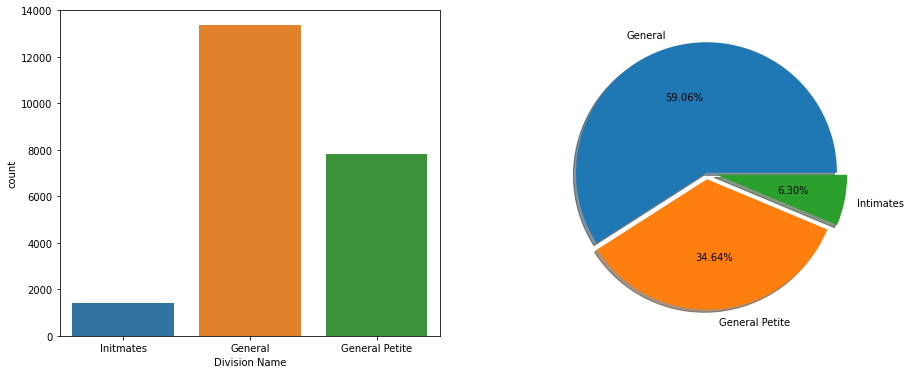

In [22]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x = df['Division Name'], data = df)

plt.subplot(1, 2, 2)

plt.pie(x= df['Division Name'].value_counts(),labels=('General','General Petite',"Intimates") ,explode = (0, 0.05,0.08), shadow = True, autopct = '%1.2f%%')

plt.show()

In [23]:
df["Department Name"].value_counts()

Tops        10048
Dresses      6145
Bottoms      3661
Intimate     1653
Jackets      1002
Trend         118
Name: Department Name, dtype: int64

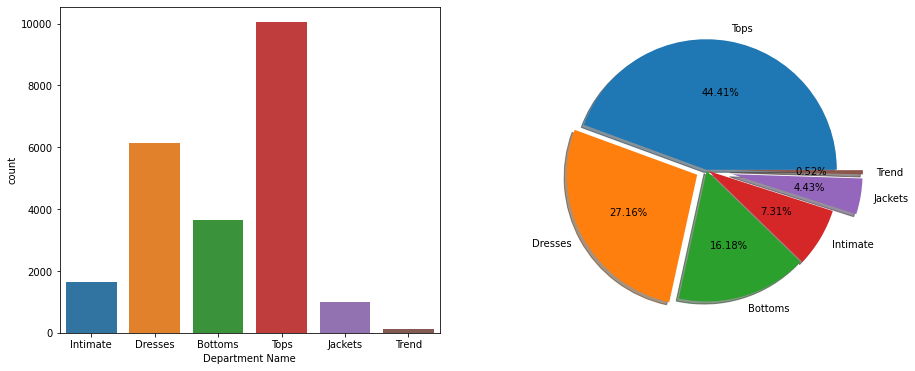

In [24]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x = df['Department Name'], data = df)

plt.subplot(1, 2, 2)
plt.pie(x= df['Department Name'].value_counts(),labels=('Tops','Dresses',"Bottoms","Intimate","Jackets","Trend") ,explode = (0, 0.08, 0.01,0.02,0.2,0.2), shadow = True, autopct = '%1.2f%%')

plt.show()

- It can be concluded that clothes in Tops section are the most available Products, while Trendy clothes are the least available ones.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Distribution')

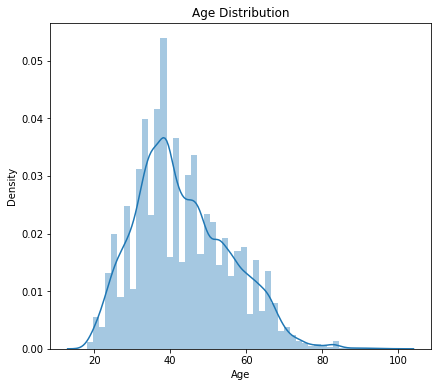

In [25]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.title = ('Age_distribution')
sns.distplot(df['Age']).set_title("Age Distribution")

- The majority of customers age between 30 and 50 yeare old.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Positive Feedback Count dist')

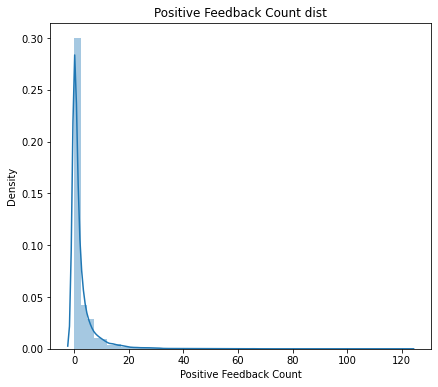

In [26]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.title = ('Positive Feedback Count')
sns.distplot(df['Positive Feedback Count']).set_title("Positive Feedback Count dist")

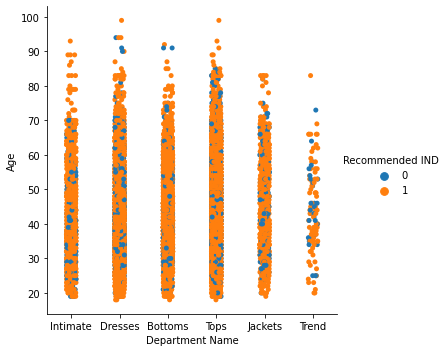

In [27]:
sns.catplot(x="Department Name", y="Age", hue="Recommended IND",data= df)

- It is clear that for every department, the majority of the products are recommended.

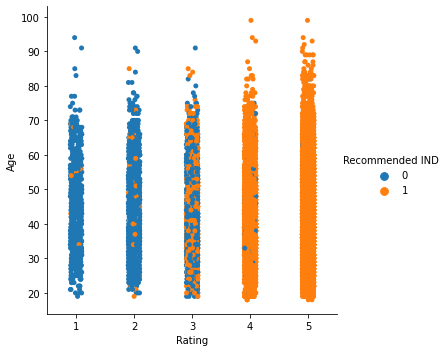

In [28]:
sns.catplot(x="Rating", y="Age", hue="Recommended IND",data= df)

- Products rated 1 and 2 are almost non-recommended by all the customers, while products rated 4 and 5 are nearly recommended by all the customers. 

# - Special Preprocessing

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22640 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              22640 non-null  int64 
 1   Age                      22640 non-null  int64 
 2   Title                    19675 non-null  object
 3   Review Text              22640 non-null  object
 4   Rating                   22640 non-null  int64 
 5   Recommended IND          22640 non-null  int64 
 6   Positive Feedback Count  22640 non-null  int64 
 7   Division Name            22627 non-null  object
 8   Department Name          22627 non-null  object
 9   Class Name               22627 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.5+ MB


In [30]:
df.drop([ "Clothing ID","Age","Title","Rating","Positive Feedback Count","Division Name","Department Name","Class Name"], axis = 1, inplace = True) #remove unnecessary columns from data


- According to the desired output of generating a model that can classify Positive and Negative reviews, all the unnecessary features have been dropped. From now on, the DataFrame contains only two features: "Review Text" and "Recommended index". 

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22640 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review Text      22640 non-null  object
 1   Recommended IND  22640 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [32]:
df.head()

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [33]:
df["Review Text"].isnull().value_counts()

False    22640
Name: Review Text, dtype: int64

In [34]:
df["Recommended IND"].isnull().value_counts()

False    22640
Name: Recommended IND, dtype: int64

# Text Manipulation

In [35]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words=stopwords.words("english")
new_stopping_words = stop_words[:len(stop_words)-36]
new_stopping_words.remove("not")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

-Noise Removal (Punctuation)

In [36]:
def remove_punc(df):
    new_text= re.sub("n't",'not', df)
    new_text= re.sub('[^\w\s]','', df)
    return new_text

In [37]:
processed_text=remove_punc(str(df["Review Text"]))
processed_text

'0        Absolutely wonderful  silky and sexy and comf\n1        Love this dress  its sooo pretty  i happene\n2        I had such high hopes for this dress and reall\n3        I love love love this jumpsuit its fun fl\n4        This shirt is very flattering to all due to th\n                                                       \n23481    I was very happy to snag this dress at such a \n23482    It reminds me of maternity clothes soft stre\n23483    This fit well but the top was very see throug\n23484    I bought this dress for a wedding i have this \n23485    This dress in a lovely platinum is feminine an\nName Review Text Length 22640 dtype object'

-Tokenization

In [38]:
def tokenizze(df):
    newdata= word_tokenize(df)
    return newdata

In [39]:
tokenized_data=tokenizze(processed_text.lower())
tokenized_data

['0',
 'absolutely',
 'wonderful',
 'silky',
 'and',
 'sexy',
 'and',
 'comf',
 '1',
 'love',
 'this',
 'dress',
 'its',
 'sooo',
 'pretty',
 'i',
 'happene',
 '2',
 'i',
 'had',
 'such',
 'high',
 'hopes',
 'for',
 'this',
 'dress',
 'and',
 'reall',
 '3',
 'i',
 'love',
 'love',
 'love',
 'this',
 'jumpsuit',
 'its',
 'fun',
 'fl',
 '4',
 'this',
 'shirt',
 'is',
 'very',
 'flattering',
 'to',
 'all',
 'due',
 'to',
 'th',
 '23481',
 'i',
 'was',
 'very',
 'happy',
 'to',
 'snag',
 'this',
 'dress',
 'at',
 'such',
 'a',
 '23482',
 'it',
 'reminds',
 'me',
 'of',
 'maternity',
 'clothes',
 'soft',
 'stre',
 '23483',
 'this',
 'fit',
 'well',
 'but',
 'the',
 'top',
 'was',
 'very',
 'see',
 'throug',
 '23484',
 'i',
 'bought',
 'this',
 'dress',
 'for',
 'a',
 'wedding',
 'i',
 'have',
 'this',
 '23485',
 'this',
 'dress',
 'in',
 'a',
 'lovely',
 'platinum',
 'is',
 'feminine',
 'an',
 'name',
 'review',
 'text',
 'length',
 '22640',
 'dtype',
 'object']

-Removing Numbers

In [40]:
def remove_num(df):
    text_without_num=[w for w in df if w.isalpha()]
    return text_without_num

In [41]:
textwithoutnum= remove_num(tokenized_data)
textwithoutnum

['absolutely',
 'wonderful',
 'silky',
 'and',
 'sexy',
 'and',
 'comf',
 'love',
 'this',
 'dress',
 'its',
 'sooo',
 'pretty',
 'i',
 'happene',
 'i',
 'had',
 'such',
 'high',
 'hopes',
 'for',
 'this',
 'dress',
 'and',
 'reall',
 'i',
 'love',
 'love',
 'love',
 'this',
 'jumpsuit',
 'its',
 'fun',
 'fl',
 'this',
 'shirt',
 'is',
 'very',
 'flattering',
 'to',
 'all',
 'due',
 'to',
 'th',
 'i',
 'was',
 'very',
 'happy',
 'to',
 'snag',
 'this',
 'dress',
 'at',
 'such',
 'a',
 'it',
 'reminds',
 'me',
 'of',
 'maternity',
 'clothes',
 'soft',
 'stre',
 'this',
 'fit',
 'well',
 'but',
 'the',
 'top',
 'was',
 'very',
 'see',
 'throug',
 'i',
 'bought',
 'this',
 'dress',
 'for',
 'a',
 'wedding',
 'i',
 'have',
 'this',
 'this',
 'dress',
 'in',
 'a',
 'lovely',
 'platinum',
 'is',
 'feminine',
 'an',
 'name',
 'review',
 'text',
 'length',
 'dtype',
 'object']

-Removing stopping words


In [42]:
def remove_stops(df):
    
    newdata=[t for t in df if t not in new_stopping_words]
    return newdata

In [43]:
data=remove_stops(textwithoutnum)
data

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comf',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happene',
 'high',
 'hopes',
 'dress',
 'reall',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'fl',
 'shirt',
 'flattering',
 'due',
 'th',
 'happy',
 'snag',
 'dress',
 'reminds',
 'maternity',
 'clothes',
 'soft',
 'stre',
 'fit',
 'well',
 'top',
 'see',
 'throug',
 'bought',
 'dress',
 'wedding',
 'dress',
 'lovely',
 'platinum',
 'feminine',
 'name',
 'review',
 'text',
 'length',
 'dtype',
 'object']

-Lemmatization

In [44]:
def lemmatizze(df):
    nltk.download('wordnet')
    from nltk.stem import WordNetLemmatizer
    newdata= [WordNetLemmatizer().lemmatize(t) for t in df]
    return newdata

In [45]:
final_data=lemmatizze(data)
final_data

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comf',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happene',
 'high',
 'hope',
 'dress',
 'reall',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'fl',
 'shirt',
 'flattering',
 'due',
 'th',
 'happy',
 'snag',
 'dress',
 'reminds',
 'maternity',
 'clothes',
 'soft',
 'stre',
 'fit',
 'well',
 'top',
 'see',
 'throug',
 'bought',
 'dress',
 'wedding',
 'dress',
 'lovely',
 'platinum',
 'feminine',
 'name',
 'review',
 'text',
 'length',
 'dtype',
 'object']

In [46]:
joined_data=" ".join(final_data)

In [47]:
joined_data

'absolutely wonderful silky sexy comf love dress sooo pretty happene high hope dress reall love love love jumpsuit fun fl shirt flattering due th happy snag dress reminds maternity clothes soft stre fit well top see throug bought dress wedding dress lovely platinum feminine name review text length dtype object'

Cleaning Data

In [48]:
def Cleaning_process(df):
    processed_text=remove_punc(str(df))
    tokenized_data=tokenizze(processed_text.lower())
    textwithoutnum= remove_num(tokenized_data)
    data=remove_stops(textwithoutnum)
    final_data=lemmatizze(data)
    return " ".join(final_data)

    

In [49]:
text = Cleaning_process(str(df["Review Text"]))
text

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'absolutely wonderful silky sexy comf love dress sooo pretty happene high hope dress reall love love love jumpsuit fun fl shirt flattering due th happy snag dress reminds maternity clothes soft stre fit well top see throug bought dress wedding dress lovely platinum feminine name review text length dtype object'

In [50]:
df["Review Text"]= df["Review Text"].apply(Cleaning_process)

Streaming output truncated to the last 5000 lines.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading packa

In [51]:

df["Review Text"].head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: Review Text, dtype: object

In [52]:
df.head()

,Review Text,Recommended IND
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store im ...,1
2,high hope dress really wanted work initially o...,0
3,love love love jumpsuit fun flirty fabulous ev...,1
4,shirt flattering due adjustable front tie perf...,1


# ML modeling 

Models i use:

1-Logistic regression

2-Linear Support Vector Machine

3-Decision Tree

4-Random Forest

6-AdaBoosting

Splitting data

In [53]:
#importing 
from sklearn.model_selection import train_test_split
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer #TF-IDF are word frequency scores that try to highlight words that are more interesting,

In [54]:
X = df_upsampled["Review Text"]
y= df_upsampled["Recommended IND"]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

vectorization 

In [56]:
#this is count vectorization methode but it wont work good with our situation 

#vectorizer = CountVectorizer()

#X_train_count = vectorizer.fit_transform(X_train)
#X_test_count = vectorizer.transform(X_test)

#type(X_train_count)
#X_train_count.toarray()
#vectorizer.get_feature_names()
#pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names())


In [57]:
X_train.shape , X_test.shape

((27262,), (6816,))

In [58]:
tf_idf_vectorizer = TfidfVectorizer()

X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [59]:
X_test_tf_idf.toarray().shape

(6816, 13061)

In [60]:
X_train_tf_idf.toarray().shape

(27262, 13061)

In [61]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [62]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,00p,02,03,03dd,04,06,0dd,0p,0petite,0r,0xs,10,100,1000,100lb,100lbs,102,102lbs,103,103lbs,104,104lbs,105,105lb,105lbs,106,106lbs,107,107lb,107lbs,107pound,108,108lbs,109,109lbs,10l,10lbs,10mths,...,yourselves,youth,youthful,youthfull,youve,yr,yrs,yuck,yucky,yuk,yumi,yummiest,yummy,yup,zag,zed,zermatt,zero,zeros,zig,zigzag,zigzagging,zillion,zip,zipepr,ziploc,zipped,zipper,zippered,zippers,zippie,zipping,zips,zombie,zone,zoolander,zoom,zooming,zuma,ã¼ber
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.191052,0.0,0.0,0.0,0.0,0.0,0.0,0.180924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27257,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27258,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27259,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27260,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Modeling 

In [63]:
#import models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [64]:
#importing validation models
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import  f1_score
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,ConfusionMatrixDisplay

function to validate score 

In [65]:
def classification_task( model,X_train_scaled, y_train ,X_test_scaled ,y_test, predic,model_name):
 
    perf_df=pd.DataFrame({'Train_Score':model.score(X_train_scaled,y_train),"Test_Score":model.score(X_test_scaled,y_test),
                       "Precision_Score":precision_score(y_test,predic),"Recall_Score":recall_score(y_test,predic),
                       "F1_Score":f1_score(y_test,predic) , "accuracy":accuracy_score(y_test,predic)}, index=[model_name])
    return perf_df

Logistic Regression With TF-IDF Vectorizer

In [66]:
# Train the Logistic Regression model on the scaled data and print the model score
lr = LogisticRegression()
# Fit the model
lr.fit(X_train_tf_idf, y_train)
#predict x_test
pred_2 = lr.predict(X_test_tf_idf)

In [67]:
#calling the score function
Eval_lr= classification_task(lr,X_train_tf_idf, y_train ,X_test_tf_idf ,y_test,pred_2,"logisitc regression" )
Eval_lr

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
logisitc regression,0.919668,0.902289,0.918087,0.900755,0.909338,0.902289


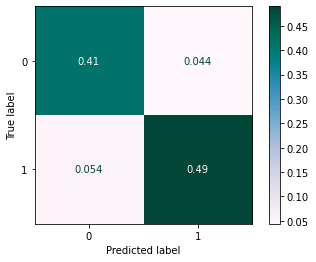

In [ ]:
#creating confusion matrix to know the errors
conf = confusion_matrix(y_test, pred_2 ,normalize="all")
disp = ConfusionMatrixDisplay(conf).plot(cmap=plt.cm.PuBuGn)

Support Vector Machine (SVM) With TF-IDF Vectorizer


In [68]:
# Train the svc model on the scaled data and print the model score
svc = SVC(random_state=0,C=0.2,kernel='rbf')
#fitting model
svc.fit(X_train_tf_idf, y_train)
#predict
pred_svc = svc.predict(X_test_tf_idf)

In [69]:
#calling the score function
Eval_svc= classification_task(svc,X_train_tf_idf, y_train ,X_test_tf_idf ,y_test,pred_svc,"SVC" )
Eval_svc  

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
SVC,0.938889,0.917987,0.944397,0.902373,0.922907,0.917987


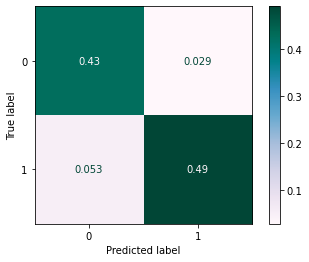

In [70]:
#creating confusion matrix to know the errors
conf = confusion_matrix(y_test, pred_svc ,normalize="all")
disp = ConfusionMatrixDisplay(conf).plot(cmap=plt.cm.PuBuGn)

Random Forest With TF-IDF Vectorizer

In [71]:
# Train Random forest model on the scaled data
Random_Forest= RandomForestClassifier()
# Fit the model
Random_Forest.fit(X_train_tf_idf,y_train)
#predict x_test_scaled
pred_rand = Random_Forest.predict(X_test_tf_idf)

In [72]:
#calling the score function
Eval_fores= classification_task(Random_Forest,X_train_tf_idf, y_train ,X_test_tf_idf ,y_test,pred_rand,"Random Forest" )
Eval_fores

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
Random Forest,1.0,0.972711,0.976461,0.973301,0.974878,0.972711


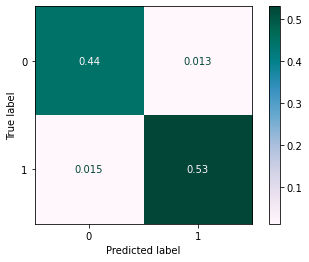

In [73]:
#creating confusion matrix to know the errors
conf = confusion_matrix(y_test, pred_rand ,normalize="all")
disp = ConfusionMatrixDisplay(conf).plot(cmap=plt.cm.PuBuGn)

decision tree With TF-IDF Vectorizer

In [74]:
# Train decision tree model on the scaled data
Decision_Tree = DecisionTreeClassifier() 
# Fit the model
Decision_Tree.fit(X_train_tf_idf,y_train)
#predict x_test_scaled
pred_ = Decision_Tree.predict(X_test_tf_idf)

In [75]:
#calling the score function
Eval_dec = classification_task(Decision_Tree,X_train_tf_idf, y_train ,X_test_tf_idf,y_test,pred_,"Decision Tree" )
Eval_dec

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
Decision Tree,1.0,0.914466,0.975937,0.864078,0.916607,0.914466


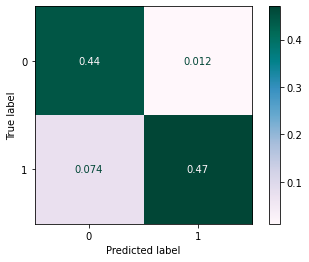

In [76]:
#creating confusion matrix to know the errors
conf = confusion_matrix(y_test, pred_ ,normalize="all")
disp = ConfusionMatrixDisplay(conf).plot(cmap=plt.cm.PuBuGn)

AdaBoost With TF-IDF Vectorizer

In [77]:
# Train adaboost model on the scaled data
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
# Fit the model
ada.fit(X_train_tf_idf, y_train)
#predict x_test
pred_ada = ada.predict(X_test_tf_idf)


In [78]:
#calling the score function
Eval_ada = classification_task(ada,X_train_tf_idf, y_train ,X_test_tf_idf,y_test,pred_,"AdaBoosting" )
Eval_ada

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
AdaBoosting,0.915083,0.886297,0.975937,0.864078,0.916607,0.914466


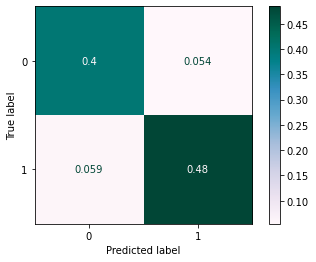

In [79]:
#creating confusion matrix to know the errors
conf = confusion_matrix(y_test, pred_ada ,normalize="all")
disp = ConfusionMatrixDisplay(conf).plot(cmap=plt.cm.PuBuGn)

In [80]:
#model comparison 
pd.concat([Eval_dec , Eval_fores , Eval_ada , Eval_lr, Eval_svc]) 

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
Decision Tree,1.000000,0.914466,0.975937,0.864078,0.916607,0.914466
Random Forest,1.000000,0.972711,0.976461,0.973301,0.974878,0.972711
AdaBoosting,0.915083,0.886297,0.975937,0.864078,0.916607,0.914466
logisitc regression,0.919668,0.902289,0.918087,0.900755,0.909338,0.902289
SVC,0.938889,0.917987,0.944397,0.902373,0.922907,0.917987


# **DL models**



## **preparing**

In [81]:
x = df_upsampled['Review Text'].values
y = df_upsampled['Recommended IND'].values

In [82]:
#tokenization

from keras.preprocessing.text import Tokenizer
num_words = 10000
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(x)
xtokens= tokenizer.texts_to_sequences(x)


In [83]:
#padding 

from keras.preprocessing.sequence import pad_sequences

maxlen=50
xpad=pad_sequences(xtokens,padding='post', maxlen=maxlen)


In [84]:
print(x[3])


I ordered these leggings and loved them, for about an hour- at which point the belt loop ripped off of the pant, leaving a hole. i called customer service and they sent me a 2nd pair. same thing happened. i never even pulled on the belt loop. they are just so flimsy. it's a shame bc they are cool looking.


In [85]:
print(xpad[3])


[1173   41   80  601    1  447 2654 1102  132   13    1  784 1637    5
  714    2 1525 1579 2213    3   45  753   27    5 1906  245  281  361
 1025    2  410   84  690   11    1  447 2654   45   30   33   15 1011
   34    5  938 1217   45   30  494  186]


In [86]:
#train_test splot
x_train, x_test, y_train, y_test = train_test_split(xpad, y, test_size=0.2, stratify=y,random_state=42)

## **LSTM MODEL**

In [87]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout,GRU,Bidirectional
from keras.initializers import Constant
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2


model=Sequential()

model.add(Embedding(input_dim=num_words,output_dim=32,input_length=maxlen))

model.add(LSTM(units=64,dropout=0.4,return_sequences=True))
model.add(LSTM(units=64,dropout=0.4,return_sequences=True))

Dense(16, activation='relu')

model.add(LSTM(units=20))
model.add(Dropout(0.5))


model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 32)            320000    
                                                                 
 lstm (LSTM)                 (None, 50, 64)            24832     
                                                                 
 lstm_1 (LSTM)               (None, 50, 64)            33024     
                                                                 
 lstm_2 (LSTM)               (None, 20)                6800      
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 384,677
Trainable params: 384,677
Non-trai

In [88]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="auto", 
                           verbose=1, patience = 10, restore_best_weights=True)

In [89]:
model.fit(x_train,y_train, epochs=20, batch_size=32, validation_data=(x_test , y_test), callbacks= [early_stop])

Epoch 1/20
852/852 [==============================] - 92s 100ms/step - loss: 0.3888 - accuracy: 0.8321 - val_loss: 0.2911 - val_accuracy: 0.8845
Epoch 2/20
852/852 [==============================] - 83s 97ms/step - loss: 0.2585 - accuracy: 0.9047 - val_loss: 0.2392 - val_accuracy: 0.9071
Epoch 3/20
852/852 [==============================] - 82s 97ms/step - loss: 0.2073 - accuracy: 0.9262 - val_loss: 0.2182 - val_accuracy: 0.9200
Epoch 4/20
852/852 [==============================] - 83s 97ms/step - loss: 0.1730 - accuracy: 0.9409 - val_loss: 0.1935 - val_accuracy: 0.9293
Epoch 5/20
852/852 [==============================] - 82s 97ms/step - loss: 0.1484 - accuracy: 0.9492 - val_loss: 0.1961 - val_accuracy: 0.9310
Epoch 6/20
852/852 [==============================] - 83s 97ms/step - loss: 0.1285 - accuracy: 0.9562 - val_loss: 0.2113 - val_accuracy: 0.9247
Epoch 7/20
852/852 [==============================] - 83s 97ms/step - loss: 0.1098 - accuracy: 0.9626 - val_loss: 0.2153 - val_accuracy

In [90]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,accuracy,val_loss,val_accuracy
0,0.388785,0.832074,0.291143,0.884536
1,0.258511,0.904739,0.239157,0.907130
2,0.207346,0.926161,0.218202,0.920041
3,0.173026,0.940870,0.193471,0.929284
4,0.148421,0.949233,0.196054,0.931045


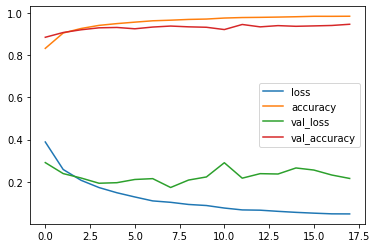

In [91]:
model_loss.plot()

In [92]:
model.evaluate(x_train, y_train)


852/852 [==============================] - 21s 23ms/step - loss: 0.0728 - accuracy: 0.9827


[0.07283787429332733, 0.9826865196228027]

In [93]:
model.evaluate(x_test, y_test)


213/213 [==============================] - 5s 22ms/step - loss: 0.1733 - accuracy: 0.9376


[0.17331615090370178, 0.9376466870307922]

In [94]:
review1 = "it fits me so well"
review = [review1 ]

In [95]:
tokens = tokenizer.texts_to_sequences(review) 


In [96]:
tokens_pad = pad_sequences(tokens, maxlen=maxlen)
tokens_pad.shape

(1, 50)

In [97]:
mod_pred = model.predict(tokens_pad)
mod_pred


array([[0.99679303]], dtype=float32)

In [98]:
df_pred = pd.DataFrame(mod_pred, index=review)
df_pred.rename(columns={0: 'Pred_Proba'}, inplace=True)

In [99]:
df_pred["Predicted_Feedbaack"] = df_pred["Pred_Proba"].apply(lambda x: 1 if x>=0.5 else 0)

In [100]:
df_pred

,Pred_Proba,Predicted_Feedbaack
it fits me so well,0.996793,1


## **GRU Model**

In [101]:
model2 = Sequential()


model2.add(Embedding(input_dim=num_words,output_dim=32,input_length=maxlen)) 

model2.add(GRU(units=48, return_sequences=True))  
model2.add(GRU(units=24, return_sequences=True))
Dense(16, activation='relu')

model2.add(GRU(units=12)) 
model2.add(Dropout(0.4))

model2.add(Dense(1, activation='sigmoid')) 
optimizer = Adam(learning_rate=0.006)
 
model2.compile(loss="binary_crossentropy", optimizer='Adam', metrics=["Accuracy"])

In [102]:
model2.summary() 


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 32)            320000    
                                                                 
 gru (GRU)                   (None, 50, 48)            11808     
                                                                 
 gru_1 (GRU)                 (None, 50, 24)            5328      
                                                                 
 gru_2 (GRU)                 (None, 12)                1368      
                                                                 
 dropout_1 (Dropout)         (None, 12)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 338,517
Trainable params: 338,517
Non-tr

In [103]:
model2.fit(x_train, y_train, epochs=20, batch_size=32, 
         validation_data=(x_test, y_test), callbacks=[early_stop])

Epoch 1/20
852/852 [==============================] - 79s 85ms/step - loss: 0.3794 - Accuracy: 0.8297 - val_loss: 0.2685 - val_Accuracy: 0.8982
Epoch 2/20
852/852 [==============================] - 72s 85ms/step - loss: 0.2306 - Accuracy: 0.9183 - val_loss: 0.2315 - val_Accuracy: 0.9131
Epoch 3/20
852/852 [==============================] - 72s 84ms/step - loss: 0.1820 - Accuracy: 0.9395 - val_loss: 0.2226 - val_Accuracy: 0.9203
Epoch 4/20
852/852 [==============================] - 73s 85ms/step - loss: 0.1392 - Accuracy: 0.9565 - val_loss: 0.2215 - val_Accuracy: 0.9283
Epoch 5/20
852/852 [==============================] - 72s 85ms/step - loss: 0.1047 - Accuracy: 0.9693 - val_loss: 0.2156 - val_Accuracy: 0.9359
Epoch 6/20
852/852 [==============================] - 73s 86ms/step - loss: 0.0825 - Accuracy: 0.9768 - val_loss: 0.2434 - val_Accuracy: 0.9299
Epoch 7/20
852/852 [==============================] - 73s 85ms/step - loss: 0.0627 - Accuracy: 0.9831 - val_loss: 0.2677 - val_Accuracy:

In [104]:
model_loss = pd.DataFrame(model2.history.history)
model_loss.head()

,loss,Accuracy,val_loss,val_Accuracy
0,0.379433,0.829726,0.268491,0.898181
1,0.230574,0.918311,0.231531,0.913146
2,0.182041,0.939476,0.222561,0.920335
3,0.139163,0.956496,0.221459,0.928257
4,0.104653,0.969335,0.215589,0.935886


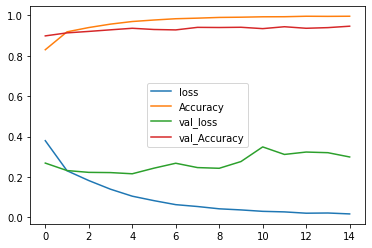

In [105]:
model_loss.plot()

In [106]:
model2.evaluate(x_train, y_train)


852/852 [==============================] - 15s 16ms/step - loss: 0.0628 - Accuracy: 0.9828


[0.06278513371944427, 0.9827598929405212]

In [107]:
model2.evaluate(x_test, y_test)


213/213 [==============================] - 3s 15ms/step - loss: 0.2156 - Accuracy: 0.9359


[0.21558877825737, 0.9358861446380615]

In [108]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = (model2.predict(x_train) >= 0.5).astype("int32")  

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

[[12273   158]
 [  312 14519]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     12431
           1       0.99      0.98      0.98     14831

    accuracy                           0.98     27262
   macro avg       0.98      0.98      0.98     27262
weighted avg       0.98      0.98      0.98     27262



In [109]:
y_pred = (model2.predict(x_test) >= 0.5).astype("int32")

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

[[3001  107]
 [ 330 3378]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      3108
           1       0.97      0.91      0.94      3708

    accuracy                           0.94      6816
   macro avg       0.94      0.94      0.94      6816
weighted avg       0.94      0.94      0.94      6816



In [110]:
review1 = "Love this dress"
review2 = "Absolutely wonderful. silky and sexy and comfortable"
review3 = "i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up!"
review4 = "I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"
review5 = 'This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!'
review6 = 'I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress.'
review7 = 'I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.'
review8 = 'Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was very tight! the material on the top looks and feels very cheap that even just pulling on it will cause it to rip the fabric. pretty disappointed as it was going to be my christmas dress this year! needless to say it will be going back.'
review9 =  "if you are at least average height or taller, this may look good on you."
review10 = "sadly will be returning, but i'm sure i will find something to exchange it for!"
review11 = "Cute little dress fits tts. it is a little high waisted. good length for my 5'9 height. i like the dress, i'm just not in love with it. i dont think it looks or feels cheap. it appears just as pictured."
review12 = 'Loved the material, but i didnt really look at how long the dress was before i purchased both a large and a medium. im 5\'5" and there was atleast 5" of material at my feet. the gaps in the front are much wider than they look. felt like the dress just fell flat. both were returned. im usually a large and the med fit better. 36d 30 in jeans'
review13 = "I have been waiting for this sweater coat to ship for weeks and i was so excited for it to arrive. this coat is not true to size and made me look short and squat."
review14 = 'not bad '
reviews = [review1, review2, review3, review4, review5, review6, review7, review8, review9, review10, review11, review12, review13, review14]

In [111]:
tokens = tokenizer.texts_to_sequences(reviews) 
tokens_pad = pad_sequences(tokens, maxlen=maxlen)
tokens_pad.shape

(14, 50)

In [112]:
mod_pred = model2.predict(tokens_pad)
mod_pred

array([[0.99388325],
       [0.9983886 ],
       [0.993574  ],
       [0.9987048 ],
       [0.99867654],
       [0.98969686],
       [0.9985013 ],
       [0.00352192],
       [0.97701204],
       [0.9807533 ],
       [0.9967836 ],
       [0.00523213],
       [0.423195  ],
       [0.478323  ]], dtype=float32)

In [113]:
df_pred = pd.DataFrame(mod_pred, index=reviews)
df_pred.rename(columns={0: 'Pred_Proba'}, inplace=True)

In [114]:
df_pred["Predicted_Feedbaack"] = df_pred["Pred_Proba"].apply(lambda x: 1 if x>=0.5 else 0)

In [115]:
df_pred

,Pred_Proba,Predicted_Feedbaack
Love this dress,0.993883,1
Absolutely wonderful. silky and sexy and comfortable,0.998389,1
i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up!,0.993574,1
"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",0.998705,1
This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,0.998677,1
"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress.",0.989697,1
I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.,0.998501,1
Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was very tight! the material on the top looks and feels very cheap that even just pulling on it will cause it to rip the fabric. pretty disappointed as it was going to be my christmas dress this year! needless to say it will be going back.,0.003522,0
"if you are at least average height or taller, this may look good on you.",0.977012,1
"sadly will be returning, but i'm sure i will find something to exchange it for!",0.980753,1


## **Bi - LSTM**

In [116]:
model3 = Sequential()

model3.add(Embedding(input_dim = num_words, output_dim = 32,input_length = maxlen))

model3.add(Bidirectional(LSTM(units = 48,return_sequences = True )))
model3.add(Bidirectional(LSTM(units = 24, return_sequences = True)))
Dense(16, activation='relu')


model3.add(Bidirectional(LSTM(units = 20)))
model3.add(Dropout(0.5))

model3.add(Dense(1, activation = 'sigmoid'))




In [117]:
optimizer = Adam(lr = 0.004)
model3.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ["Accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [118]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 32)            320000    
                                                                 
 bidirectional (Bidirectiona  (None, 50, 96)           31104     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 50, 48)           23232     
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 40)               11040     
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 40)                0         
                                                      

In [119]:
model3.fit(x_train, y_train, epochs = 20, batch_size = 32,
         validation_data = (x_test, y_test), callbacks = [early_stop])

Epoch 1/20
852/852 [==============================] - 119s 126ms/step - loss: 0.3539 - Accuracy: 0.8529 - val_loss: 0.2585 - val_Accuracy: 0.9023
Epoch 2/20
852/852 [==============================] - 105s 124ms/step - loss: 0.2163 - Accuracy: 0.9230 - val_loss: 0.2046 - val_Accuracy: 0.9265
Epoch 3/20
852/852 [==============================] - 106s 124ms/step - loss: 0.1512 - Accuracy: 0.9480 - val_loss: 0.1890 - val_Accuracy: 0.9349
Epoch 4/20
852/852 [==============================] - 106s 124ms/step - loss: 0.1067 - Accuracy: 0.9646 - val_loss: 0.1868 - val_Accuracy: 0.9422
Epoch 5/20
852/852 [==============================] - 106s 124ms/step - loss: 0.0737 - Accuracy: 0.9766 - val_loss: 0.1869 - val_Accuracy: 0.9438
Epoch 6/20
852/852 [==============================] - 105s 123ms/step - loss: 0.0499 - Accuracy: 0.9846 - val_loss: 0.3091 - val_Accuracy: 0.9215
Epoch 7/20
852/852 [==============================] - 107s 125ms/step - loss: 0.0418 - Accuracy: 0.9868 - val_loss: 0.2430 -

In [120]:
model_loss = pd.DataFrame(model3.history.history)
model_loss.head()

,loss,Accuracy,val_loss,val_Accuracy
0,0.353869,0.852872,0.258456,0.902289
1,0.216268,0.923043,0.204625,0.926497
2,0.151220,0.947986,0.188992,0.934859
3,0.106748,0.964639,0.186765,0.942195
4,0.073657,0.976634,0.186897,0.943809


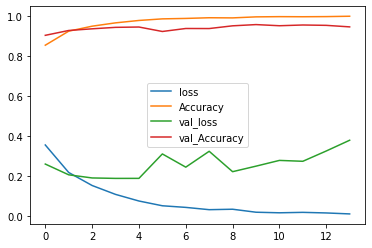

In [121]:
model_loss.plot()

In [122]:
model3.evaluate(x_train, y_train)


852/852 [==============================] - 25s 26ms/step - loss: 0.0576 - Accuracy: 0.9826


[0.057572707533836365, 0.9825764894485474]

In [123]:
model3.evaluate(x_test, y_test)


213/213 [==============================] - 5s 25ms/step - loss: 0.1868 - Accuracy: 0.9422


[0.1867646425962448, 0.9421948194503784]

In [124]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = (model3.predict(x_train) >= 0.5).astype("int32")  

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

[[12298   133]
 [  342 14489]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     12431
           1       0.99      0.98      0.98     14831

    accuracy                           0.98     27262
   macro avg       0.98      0.98      0.98     27262
weighted avg       0.98      0.98      0.98     27262



In [125]:
y_pred = (model3.predict(x_test) >= 0.5).astype("int32")

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

[[3015   93]
 [ 301 3407]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3108
           1       0.97      0.92      0.95      3708

    accuracy                           0.94      6816
   macro avg       0.94      0.94      0.94      6816
weighted avg       0.94      0.94      0.94      6816



In [126]:
review1 = "Love this dress"
review2 = "Absolutely wonderful. silky and sexy and comfortable"
review3 = "i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up!"
review4 = "I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"
review5 = 'This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!'
review6 = 'I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress.'
review7 = 'I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.'
review8 = 'Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was very tight! the material on the top looks and feels very cheap that even just pulling on it will cause it to rip the fabric. pretty disappointed as it was going to be my christmas dress this year! needless to say it will be going back.'
review9 =  "if you are at least average height or taller, this may look good on you."
review10 = "sadly will be returning, but i'm sure i will find something to exchange it for!"
review11 = "Cute little dress fits tts. it is a little high waisted. good length for my 5'9 height. i like the dress, i'm just not in love with it. i dont think it looks or feels cheap. it appears just as pictured."
review12 = 'Loved the material, but i didnt really look at how long the dress was before i purchased both a large and a medium. im 5\'5" and there was atleast 5" of material at my feet. the gaps in the front are much wider than they look. felt like the dress just fell flat. both were returned. im usually a large and the med fit better. 36d 30 in jeans'
review13 = "I have been waiting for this sweater coat to ship for weeks and i was so excited for it to arrive. this coat is not true to size and made me look short and squat."
review14 = 'not bad '
reviews = [review1, review2, review3, review4, review5, review6, review7, review8, review9, review10, review11, review12, review13, review14]

In [127]:
tokens = tokenizer.texts_to_sequences(reviews) 
tokens_pad = pad_sequences(tokens, maxlen=maxlen)
tokens_pad.shape

(14, 50)

In [ ]:
tokens

In [ ]:
tokens_pad

In [130]:
mod_pred = model3.predict(tokens_pad)
mod_pred

array([[0.36125916],
       [0.9757484 ],
       [0.8585081 ],
       [0.9907396 ],
       [0.9938165 ],
       [0.9305359 ],
       [0.9750538 ],
       [0.00139418],
       [0.4509177 ],
       [0.9617314 ],
       [0.97573364],
       [0.00446737],
       [0.04507905],
       [0.35196218]], dtype=float32)

In [131]:
df_pred = pd.DataFrame(mod_pred, index=reviews)
df_pred.rename(columns={0: 'Pred_Proba'}, inplace=True)

In [132]:
df_pred["Predicted_Feedbaack"] = df_pred["Pred_Proba"].apply(lambda x: 1 if x>=0.5 else 0)

In [133]:
df_pred

,Pred_Proba,Predicted_Feedbaack
Love this dress,0.361259,0
Absolutely wonderful. silky and sexy and comfortable,0.975748,1
i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up!,0.858508,1
"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",0.990740,1
This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,0.993816,1
"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress.",0.930536,1
I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.,0.975054,1
Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was very tight! the material on the top looks and feels very cheap that even just pulling on it will cause it to rip the fabric. pretty disappointed as it was going to be my christmas dress this year! needless to say it will be going back.,0.001394,0
"if you are at least average height or taller, this may look good on you.",0.450918,0
"sadly will be returning, but i'm sure i will find something to exchange it for!",0.961731,1


## **Bi-LSTM2**

In [211]:
!wget --no-check-certificate \
    http://nlp.stanford.edu/data/glove.6B.zip \
    -O /tmp/glove.6B.zip

--2022-01-12 08:16:43--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-01-12 08:16:44--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-01-12 08:16:44--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘/tmp/glove.6B.zip’

/t

In [212]:
import zipfile

with zipfile.ZipFile('/tmp/glove.6B.zip', 'r') as zip_ref:
    zip_ref.extractall('/tmp/glove')

In [213]:
vocab_size = 5000
embedding_dim = 16
max_len = 100
trunction_type='post'
padding_type='post'
oov_token = "<OOV>"

In [216]:
tokenize = Tokenizer(num_words = vocab_size, oov_token=oov_token)
tokenize.fit_on_texts(x)

In [217]:
word_index = tokenize.word_index

In [218]:
X_train = tokenize.texts_to_sequences(x)


In [219]:
X_train_pad = pad_sequences(X_train,maxlen=max_len, padding=padding_type, 
                            truncating=trunction_type)

In [226]:
x_train, x_test, y_train, y_test = train_test_split(X_train_pad, y, test_size=0.2, stratify=y,random_state=42)

In [220]:
embeddings_index = {}
f = open('/tmp/glove/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    try:
       coefs = np.asarray(values[1:], dtype='float32')
       embeddings_index[word] = coefs
    except ValueError:
       pass
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [221]:
num_words = len(word_index) + 1

embedding_matrix = np.zeros((num_words, max_len))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word) 
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [222]:
embedding_layer = Embedding(num_words,
                            max_len,
                            weights=[embedding_matrix],
                            input_length=max_len,
                            trainable=False)

In [223]:
import tensorflow as tf

In [224]:
model4 = Sequential([
    embedding_layer,
    Bidirectional(LSTM(64, return_sequences=True)), 
    Bidirectional(LSTM(32)),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam(lr=1e-4)
model4.compile(loss='binary_crossentropy', 
               optimizer=optimizer,
               metrics=['accuracy'])

model4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 100)          1481400   
                                                                 
 bidirectional_13 (Bidirecti  (None, 100, 128)         84480     
 onal)                                                           
                                                                 
 bidirectional_14 (Bidirecti  (None, 64)               41216     
 onal)                                                           
                                                                 
 dense_16 (Dense)            (None, 16)                1040      
                                                                 
 dropout_8 (Dropout)         (None, 16)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [225]:
callbacks = EarlyStopping(monitor = 'val_accuracy', 
                          mode = 'max', 
                          patience = 10,
                          verbose = 1)

In [227]:
history2 = model4.fit(x_train, y_train,
                    batch_size=32,
                    epochs=20,
                    validation_data=(x_test, y_test),
                    verbose=1,)

Epoch 1/20
852/852 [==============================] - 199s 224ms/step - loss: 0.6291 - accuracy: 0.6527 - val_loss: 0.5323 - val_accuracy: 0.7587
Epoch 2/20
852/852 [==============================] - 182s 214ms/step - loss: 0.5244 - accuracy: 0.7681 - val_loss: 0.5190 - val_accuracy: 0.7359
Epoch 3/20
852/852 [==============================] - 183s 214ms/step - loss: 0.4740 - accuracy: 0.7921 - val_loss: 0.4261 - val_accuracy: 0.8107
Epoch 4/20
852/852 [==============================] - 182s 214ms/step - loss: 0.4452 - accuracy: 0.8090 - val_loss: 0.3910 - val_accuracy: 0.8279
Epoch 5/20
852/852 [==============================] - 182s 214ms/step - loss: 0.4213 - accuracy: 0.8229 - val_loss: 0.3964 - val_accuracy: 0.8316
Epoch 6/20
852/852 [==============================] - 183s 215ms/step - loss: 0.4017 - accuracy: 0.8321 - val_loss: 0.3697 - val_accuracy: 0.8330
Epoch 7/20
852/852 [==============================] - 182s 213ms/step - loss: 0.3820 - accuracy: 0.8452 - val_loss: 0.3487 -

In [228]:
loss, accuracy = model4.evaluate(x_test,y_test)
print('Test accuracy :', accuracy)

213/213 [==============================] - 11s 52ms/step - loss: 0.2668 - accuracy: 0.8938
Test accuracy : 0.8937793374061584


In [229]:
model_loss = pd.DataFrame(history2.history)
model_loss.head()

,loss,accuracy,val_loss,val_accuracy
0,0.629125,0.652667,0.532309,0.758656
1,0.524357,0.768065,0.518983,0.735915
2,0.473973,0.792128,0.426083,0.810739
3,0.445249,0.809038,0.390995,0.827905
4,0.421341,0.822904,0.396407,0.831573


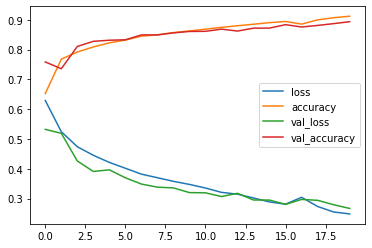

In [230]:
model_loss.plot()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [231]:
model.save("/content/drive/MyDrive/Model1/LSTM.h5")

In [232]:
model2.save("/content/drive/MyDrive/Model2/GRU.h5")

In [233]:
model3.save("/content/drive/MyDrive/Model3/bilstm.h5")

In [234]:
model4.save("/content/drive/MyDrive/model4 bi/bilstm2.h5")